## Avocado Price Prediction

In this project I used Time Series Analysis for predicting avocado prices

I used Prophet for Time Series analysis (fbprophet by Facebook)

Also used seaborn and matplotlib for data visulization

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from fbprophet import Prophet
import matplotlib.dates as mdates

Importing plotly failed. Interactive plots will not work.


In [2]:
# Read the dataset

df = pd.read_csv('avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.shape

(18249, 14)

In [5]:
# Some relevant columns in the dataset:

# Date - The date of the observation

# AveragePrice - the average price of a single avocado

# type - conventional or organic

# year - the year

# Region - the city or region of the observation

# Total Volume - Total number of avocados sold

# 4046 - Total number of avocados with PLU 4046 sold  (Small Hass)
# 4225 - Total number of avocados with PLU 4225 sold  (Large Hass)
# 4770 - Total number of avocados with PLU 4770 sold  (XLarge Hass)

In [6]:
# Weekly 2018 retail scan data for National retail volume (units) and price.

# Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

# The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

# The Product Lookup codes (PLU’s) in the table are only for Hass avocados.

# Other varieties of avocados (e.g. greenskins) are not included in this table.

In [7]:
df.isnull().sum()     # checking if there are any NULL variable in the dataset

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.describe().round(2) # Rounding float values to two decimal points

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,24.23,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,15.48,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.00,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,10.00,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,24.00,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,38.00,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,52.00,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
# To summarise the dataset we see;

# 14 columns (variables) and 18249 rows (observations)

# There isn't any NULL variable

# data types: float64(9), int64(2), object(3)

# there are some unnamed/undefined columns

# 'region','type' and 'date' columns are in object format

In [11]:
# Target of this project is to predict the future price of avocados depending on those variables we have; 

# * Type     *Bags(4 units) vs Bundle(one unit)     *Region      *Volume      *Size     *Years


In [12]:
# PREPROCESSING

# drop unnamed column and rename undefined columns;
df = df.drop(['Unnamed: 0'], axis = 1)

df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

In [13]:
# convert Date column's format;

df['Date'] =pd.to_datetime(df.Date)

df.sort_values(by=['Date'], inplace=True, ascending=True)

df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


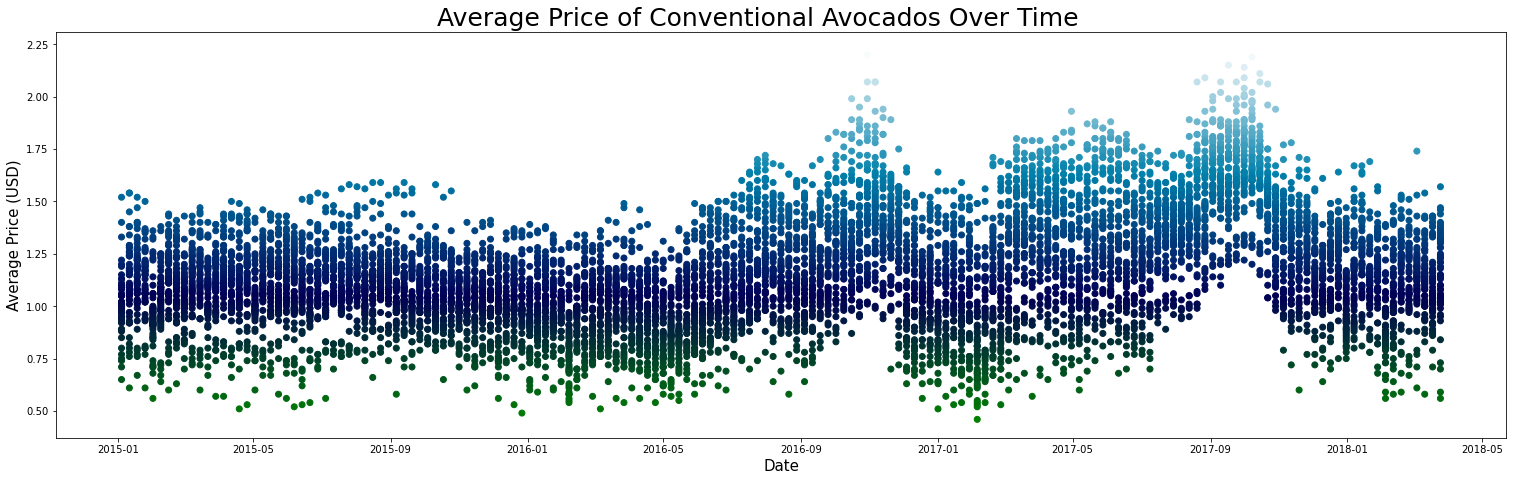

In [31]:
# Average price of Conventional Avocados over time

mask = df['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='ocean')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

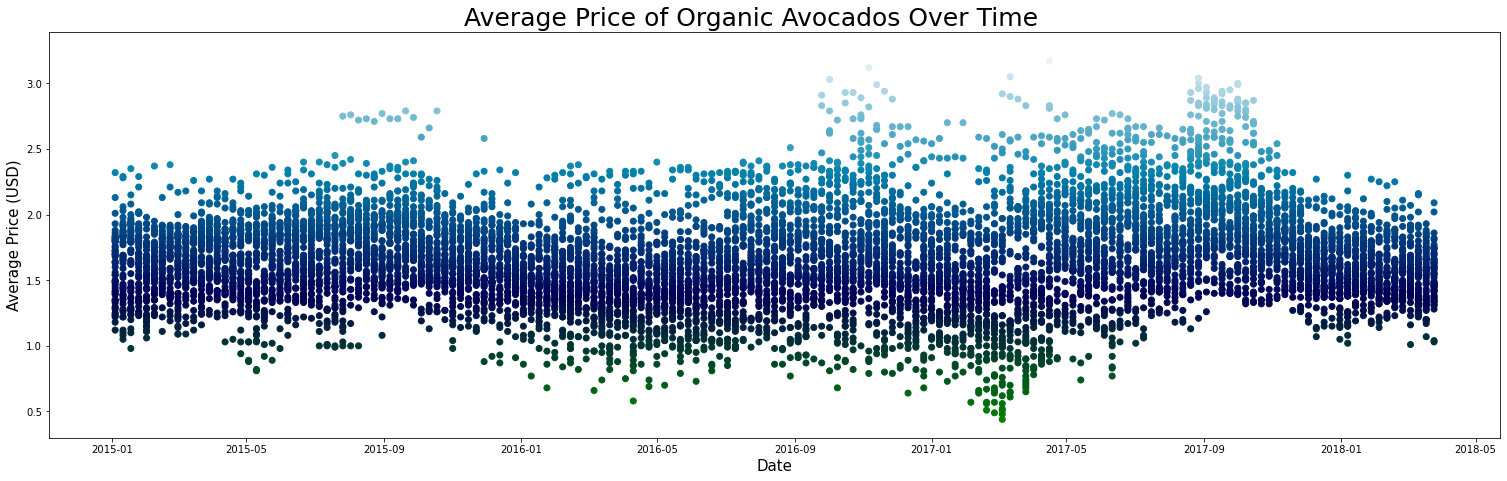

In [32]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='ocean')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

In [16]:
# TIME SERIES ANALYSIS

# Since the data itself is a time series data, we want to see time series analysis predictions, and then apply ML models.

# Creating a two-column dataset to use in time series analysis;

df2 = df[['Date', 'AveragePrice']]
df2 = df2.set_index('Date')

weekly_df = df2.resample('W').mean()
w_df = weekly_df.reset_index().dropna()

w_df.sort_values(by=['Date'])
w_df.head()


,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


No handles with labels found to put in legend.


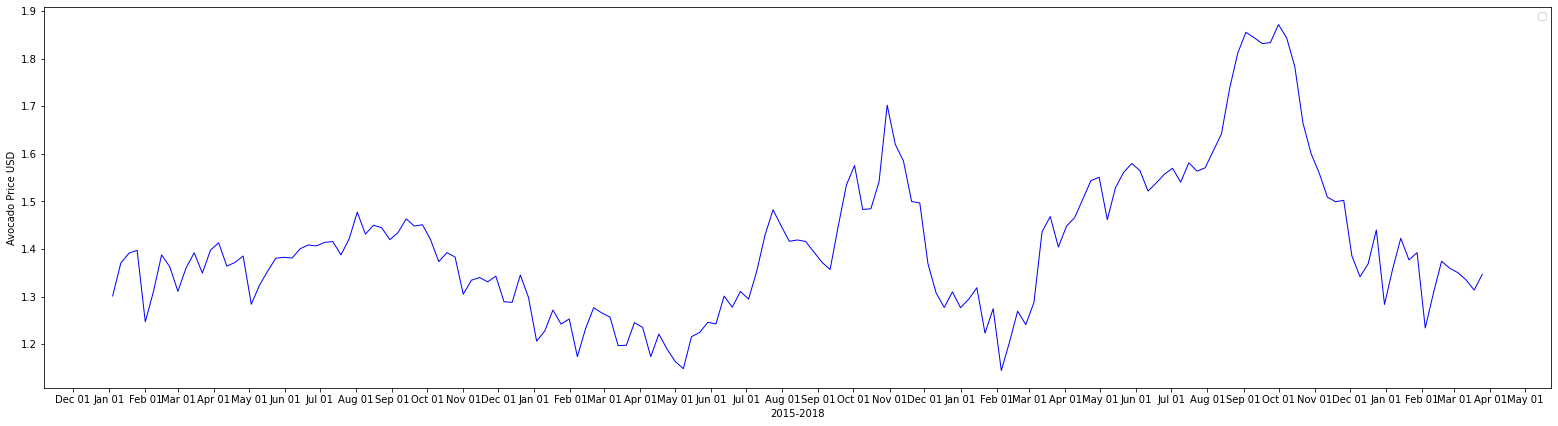

In [17]:
# Plotting the weekly average prices by month;

fig = plt.figure(figsize = (27, 7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(w_df['Date'],w_df['AveragePrice'],color='b', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Avocado Price USD")
plt.legend()
plt.show()

In [18]:
# Time Series Forecasts using Facebook's Prophet()

w_df.columns = ['ds', 'y']

P=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False, changepoint_range=1) 
#interval_width sets the uncertainty interval to produce a confidence interval around the forecast

P.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)


P.fit(w_df)

future = P.make_future_dataframe(freq='W', periods=4)  # Let's predict the next month's average prices

future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
168,2018-03-25
169,2018-04-01
170,2018-04-08
171,2018-04-15
172,2018-04-22


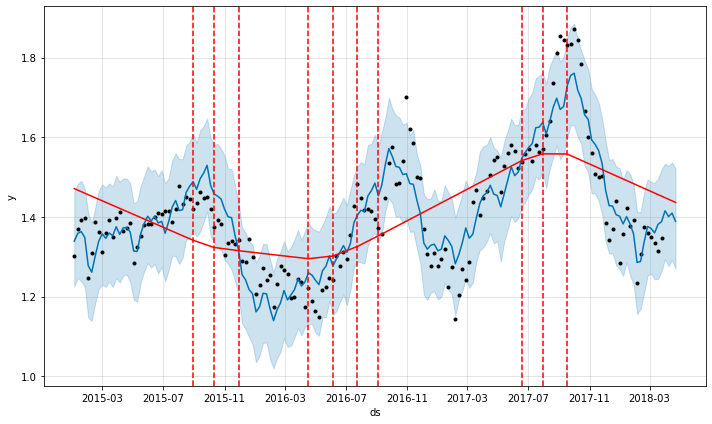

In [19]:
from fbprophet.plot import add_changepoints_to_plot

forecast = P.predict(future)
fig = P.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), P, forecast)

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
168,2018-03-25,1.387964,1.263467,1.519281
169,2018-04-01,1.415136,1.293950,1.533605
170,2018-04-08,1.400699,1.276339,1.527481
171,2018-04-15,1.409338,1.291814,1.536598
172,2018-04-22,1.388708,1.269358,1.521116


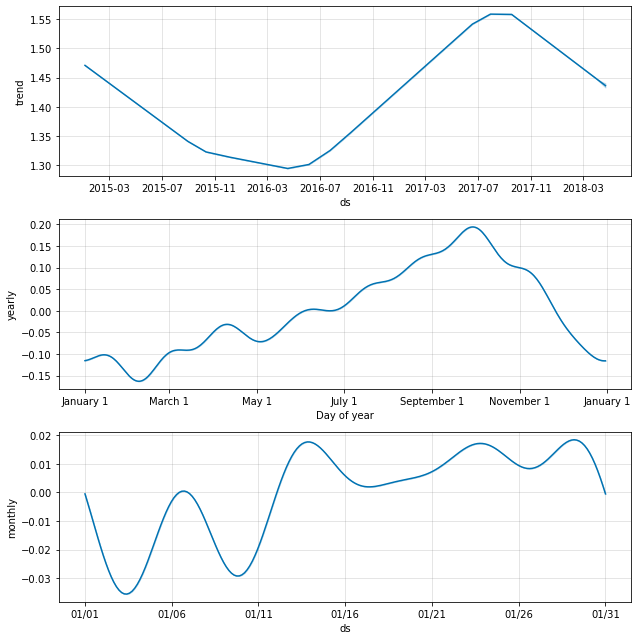

In [21]:
fig2 = P.plot_components(forecast)


In [22]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(P, initial = '365 days', period = '30 days', horizon = '30 days')

df_cv.tail()

INFO:fbprophet:Making 27 forecasts with cutoffs between 2016-01-05 00:00:00 and 2018-02-23 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
111,2018-02-25,1.418797,1.291116,1.544987,1.359630,2018-02-23
112,2018-03-04,1.425050,1.297366,1.540745,1.350185,2018-02-23
113,2018-03-11,1.424319,1.298078,1.546643,1.335093,2018-02-23
114,2018-03-18,1.451590,1.329339,1.575422,1.313704,2018-02-23
115,2018-03-25,1.453713,1.336491,1.580420,1.346852,2018-02-23


In [23]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()


,horizon,mse,rmse,mae,mape,mdape,coverage
23,26 days,0.019542,0.139793,0.103246,0.070457,0.044929,0.340909
24,27 days,0.010483,0.102387,0.076042,0.053332,0.032991,0.500000
25,28 days,0.009491,0.097422,0.082733,0.057548,0.045018,0.454545
26,29 days,0.019207,0.138588,0.116963,0.079077,0.099138,0.363636
27,30 days,0.026991,0.164290,0.152878,0.103947,0.105591,0.181818


In [24]:
np.mean(df_p['mape'])

0.07741618647851693

In [25]:
np.mean(df_p['rmse'])

0.1322250996777737

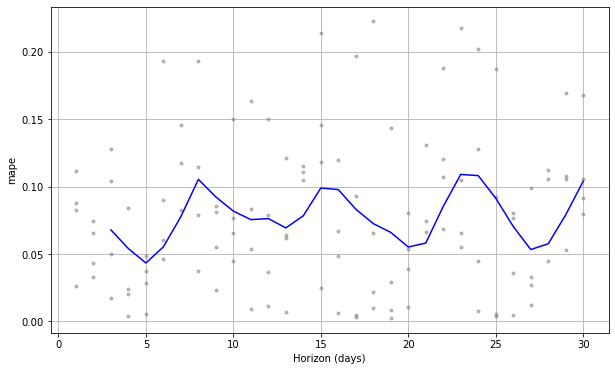

In [26]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
# mean absolute percentage error MAPE  


In [27]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

forecastedvalues

# Predictions for the next month are as follows;

,ds,yhat
168,2018-03-25,1.387964
169,2018-04-01,1.415136
170,2018-04-08,1.400699
171,2018-04-15,1.409338
172,2018-04-22,1.388708


In [28]:
# We already know that y=1.347 for 2018-03-25, and the model prediction is 1.388, which is actually over 3% of the real value.

Red = Predicted Values, Blue = Base Values


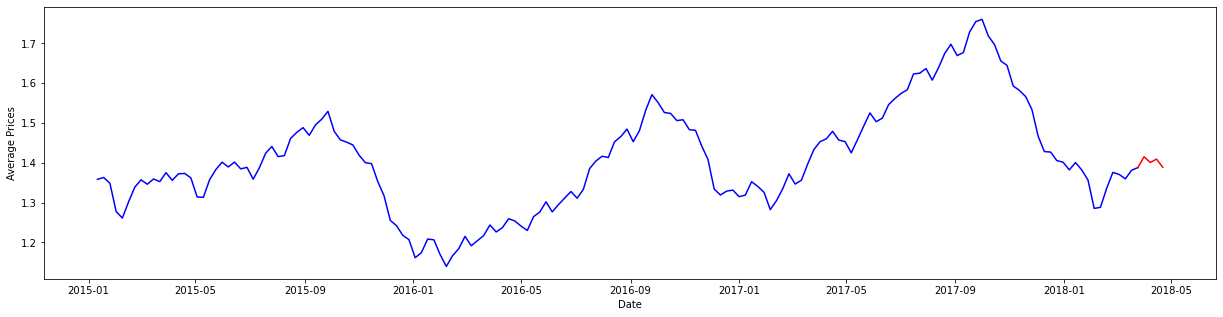

In [29]:
fig, ax1 = plt.subplots(figsize=(21, 5))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

In [30]:
# With Facebook Prophet() we obtain forecasts which are off by 8% due to MAPE values. (Accuracy= 92%)

# The Prophet predicts future prices in a downward trend.